In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def preProcess(img):

    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11,12)
    kernel = np.ones((3,3), np.uint8)
    img = cv2.dilate(img, kernel, iterations=2)
    return img



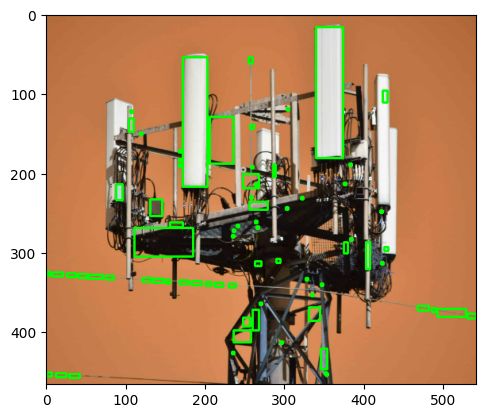

In [4]:

img = img_contorno = cv2.imread("antena.png")
img_process = preProcess(img)

contornos, hier = cv2.findContours(img_process, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#img_contorno = cv2.drawContours(img_contorno, contornos, -1 , (0,255,0), 3)

for c in contornos:
    perimeter = cv2.arcLength(c, True)

    if perimeter > 0:
        aprox = cv2.approxPolyDP(c, 0.03 * perimeter, True)
        if len(aprox) == 4:
            (x, y, alt, lar) = cv2.boundingRect(c)
            cv2.rectangle(img, (x,y), (x+alt, y+lar), (0,255,0), 2)

plt.subplot(1, 1, 1) 
plt.imshow(img) 
plt.show() 